# Customer Churn Prediction for SyriaTel Telecommunication Company
### Objective
Build a classification model to predict customer churn in SyriaTel's Telecommunication company, enabling targeted interventions to retain at-risk customers.

### Purpose
Reduce SyriaTel’s customer churn rate by developing a predictive model that identifies at-risk customers and delivers actionable insights for targeted retention strategies, ultimately lowering acquisition costs and increasing customer lifetime value.

### Approach
Use customer data(e.g, area code, billing information, subcription plan e.t.c) to develop a predictive model through stages of business understanding, data understanding,,preprocessing, modeling, evaluating and lastly deployment.

## 1. Business Understanding
### 1.1 Business Overview
SyriaTel, a leading telecommunication provider in Syria, operates in a highly competitive market where customer retention is critical due to high customer acquisition costs. Customer churn when customers switch to competitors (e.g., MTN Syria) or discontinue services directly erodes revenue and profitability. By leveraging predictive analytics, SyriaTel aims to identify at-risk customers and implement targeted retention strategies, such as tailored promotions, enhanced service offerings, or improved customer support, to maintain loyalty and strengthen its market position in Syria’s telecom sector.

### 1.2 Problem Statement
Customer churn poses a significant challenge for SyriaTel, leading to revenue loss and increased marketing expenses. Without predictive insights, SyriaTel struggles to identify which customers are likely to churn and the underlying reasons, limiting the effectiveness of retention efforts. The problem is to develop a classification model that accurately predicts customer churn based on SyriaTel’s customer data (e.g., usage patterns, plan types, billing, and service interactions), enabling proactive and targeted interventions to reduce churn rates and improve customer retention.

### 1.3 Business Objectives
#### Main Objective
Develop a predictive model to identify SyriaTel customers at high risk of churn. 
#### Specific Objective
1. Identify key factors driving churn at SyriaTel (e.g., high billing charges, frequent customer service calls, lack of international or voicemail plans) to inform service and pricing improvements.
2. Segment at-risk customers (e.g., by plan type, call usage, or tenure) to prioritize retention efforts for high-value groups.
3. Optimize resource allocation for SyriaTel’s marketing and customer service teams by targeting interventions based on churn predictions, reducing costs and improving efficiency.

### 1.4 Research Questions
- What are the primary factors (e.g., high total day charge, frequent customer service calls, or absence of international plan) contributing to customer churn at SyriaTel?
- Which customer segments (e.g., long-tenure vs. short-tenure customers, high vs. low usage, or specific area code regions) are most likely to churn?
- How can SyriaTel use churn predictions to allocate marketing and customer service resources effectively (e.g., offering discounts to high-usage customers or improving support for those with frequent complaints)?

### 1.5 Success Criteria 
Model Performance Metrics:
Achieve high recall above 80% to ensure most at-risk customers are identified for retention efforts.
Balanced performance, with an ROC AUC above 80% and f1-score of 70%, to guarantee that the models are both reliable and discriminative.

- Increase customer satisfaction (e.g., through reduced customer service calls or improved feedback) by addressing key churn drivers.



### 2. Data Understanding
We assessed SyriaTel’s customer dataset(from Kaggle open source) to ensure it is relevant, sufficient, and suitable for building a churn prediction model.   
Data description  
Customer Data (Provided):Account Information: account length (tenure in months), area code, phone number, state.      
Service Usage: international plan (yes/no), voice mail plan (yes/no), number vmail messages, total day minutes, total day calls, total eve minutes, total eve calls, total night minutes, total night calls, total intl minutes, total intl calls.        
Billing: total day charge, total eve charge, total night charge, total intl charge.       
Customer Support: customer service calls.      
Target Variable: churn (True/False, indicating whether the customer churned).

#### 2.1 Explanatory Analysis
This section we will be looking into the SyriaTel dataset in detail to familiarize ourselves with the feel of the data. Its volume, shape, description of the variables among other aspects in the dataset.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


data = pd.read_csv('syriatel.csv', index_col = 0)
data.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,,,,,,,,,,,,,,,,,,,,
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
data.shape

(3333, 20)

In [3]:
# Inspecting the columnsr
data.columns

Index(['account length', 'area code', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [4]:
# Inspecting the dataset
data.dtypes

account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
# Inspectin the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, KS to TN
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   float6

In [6]:
# Insecting the dataset
data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The dataset has sufficient records to support a robust modeling.
Consists of 3,333 records and 20 columns. 

In [7]:
# Checking for missing valuess
data.isna().sum()

account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset dosent seem to have any missing values. Quite a smooth start.

### 2.2 Data Preparation

In [8]:
# Checking for duplicates in our dataset
data.duplicated().sum()

np.int64(0)

We dont seem to have any duplicates in our dataset.

In [9]:
# Logical consistency: Voicemail messages
inconsistent_vmail = data[(data['voice mail plan'] == 'no') & (data['number vmail messages'] > 0)]
print(f"Inconsistent voicemail entries: {len(inconsistent_vmail)}")

Inconsistent voicemail entries: 0


This shows voicemail messages are consistent

In [10]:
# Checking for international pricing 
print(data.groupby('international plan')['total day charge'].mean())

international plan
no     30.412495
yes    31.958390
Name: total day charge, dtype: float64


In [11]:
# Checking for consistency in our dataset
data = data.reset_index()
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# Assessing the dataset  
data['international plan'].value_counts()



international plan
no     3010
yes     323
Name: count, dtype: int64

In [13]:
# Checking for format in the dataset
data['phone number'].head()      


0    382-4657
1    371-7191
2    358-1921
3    375-9999
4    330-6626
Name: phone number, dtype: object

In [14]:
# Assessing dataset
data['voice mail plan'].value_counts()

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

In [15]:
# Assessing whether state would be useful in our prediction 
data.groupby("state")["churn"].mean().sort_values()


state
HI    0.056604
AK    0.057692
AZ    0.062500
VA    0.064935
IA    0.068182
LA    0.078431
NE    0.081967
IL    0.086207
WI    0.089744
RI    0.092308
DC    0.092593
TN    0.094340
WV    0.094340
NM    0.096774
ND    0.096774
AL    0.100000
VT    0.109589
MO    0.111111
WY    0.116883
ID    0.123288
IN    0.126761
FL    0.126984
OH    0.128205
SD    0.133333
KY    0.135593
CO    0.136364
UT    0.138889
OR    0.141026
OK    0.147541
DE    0.147541
GA    0.148148
NH    0.160714
NC    0.161765
CT    0.162162
MA    0.169231
PA    0.177778
MN    0.178571
NY    0.180723
KS    0.185714
AR    0.200000
MT    0.205882
ME    0.209677
WA    0.212121
NV    0.212121
MS    0.215385
MI    0.219178
SC    0.233333
MD    0.242857
TX    0.250000
NJ    0.264706
CA    0.264706
Name: churn, dtype: float64

In [16]:
# Dealing with categorical columns
cols_to_convert=['international plan','voice mail plan']
data[cols_to_convert]=data[cols_to_convert].replace({'yes':1, 'no':0})
data.head(2)

/tmp/ipykernel_3697/2040180438.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[cols_to_convert]=data[cols_to_convert].replace({'yes':1, 'no':0})


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


#### Summary
The dataset is clean and ready for preprocessig.

### 2.3 Exploratory Data Analysis

In [17]:
# Make sure target is 0/1
data['churn'].astype(int)

df = data.copy()

df['churn_num'] = df['churn'].astype(int)

# identifying the baseline for churning
baseline = df['churn_num'].mean()
print(f"Baseline churn rate: {baseline:.2%}  (n={len(df)})")

# categorical signals risk ratios
def churn_rate_by(cat):
    out = (df.groupby(cat)['churn_num']
             .agg(['mean','count'])
             .rename(columns={'mean':'churn_rate','count':'n'})
             .sort_values('churn_rate', ascending=False))
    return out

def risk_ratio(cat, positive_value):
    # RR = churn_rate(positive) / churn_rate(negative)
    a = df.loc[df[cat]==positive_value, 'churn_num'].mean()
    b = df.loc[df[cat]!=positive_value, 'churn_num'].mean()
    return a/b if b>0 else np.nan


Baseline churn rate: 14.49%  (n=3333)


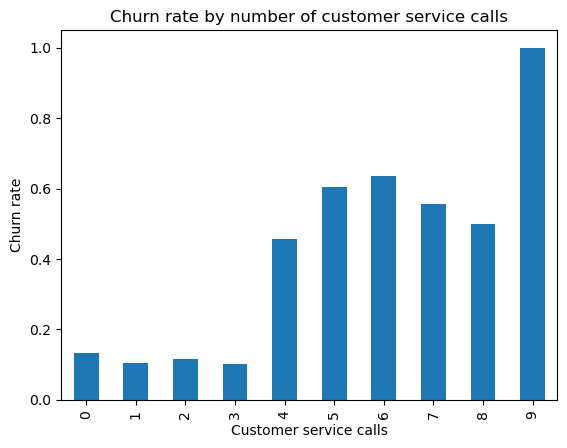

In [18]:
 # Visualization churn rate by number of customer service calls
calls_tbl = (df.groupby('customer service calls')['churn_num']
               .mean()
               .rename('churn_rate'))
ax = calls_tbl.plot(kind='bar')
ax.set_title('Churn rate by number of customer service calls')
ax.set_ylabel('Churn rate')
ax.set_xlabel('Customer service calls')
plt.show()

From the above its evident that frequent customer service calls increases the rate of churning. 9 in this case is the most service called and its leading with churn rate. Here, the a precaution should be taken to fix the underlying issue related to that section of the organization, to avoid frequent calls from customers reporting an issue with the service.

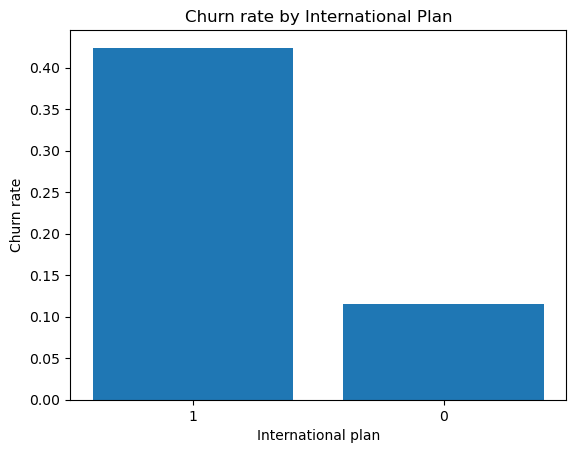

In [19]:
#  Visualization churn rate by International Plan
intl_tbl = churn_rate_by('international plan').reset_index()
ax = plt.figure().gca()
ax.bar(intl_tbl['international plan'].astype(str), intl_tbl['churn_rate'])
ax.set_title('Churn rate by International Plan')
ax.set_ylabel('Churn rate'); ax.set_xlabel('International plan')
plt.show()

The above shows that customers with an international plan seem to churn more as compared to those without the plan. So there is a likelyhood of an underlying issue in terms of strategic planning. The company should devise a way to on how to handle international plan without losing customers.

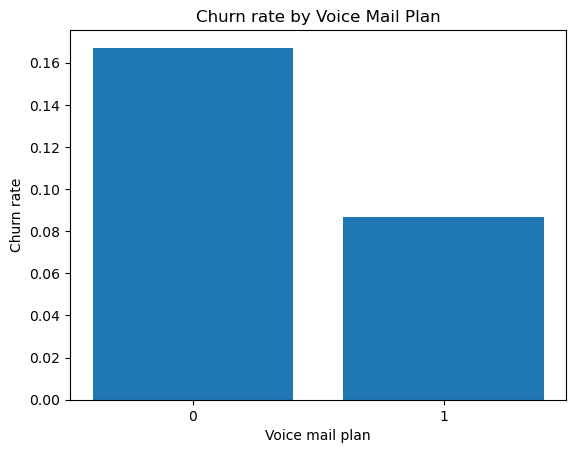

In [20]:
# Visualization churn rate by Voice Mail Plan
vm_tbl = churn_rate_by('voice mail plan').reset_index()
ax = plt.figure().gca()
ax.bar(vm_tbl['voice mail plan'].astype(str), vm_tbl['churn_rate'])
ax.set_title('Churn rate by Voice Mail Plan')
ax.set_ylabel('Churn rate'); ax.set_xlabel('Voice mail plan')
plt.show()

The observation made from the above clearly shows that customers with no Voice mail plan churn more compared to those with the plan. In this case, its advisable for the company to invest on the plan to avoid this behavior in the future.

/tmp/ipykernel_3697/4055975930.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tbl = df.groupby(b)['churn_num'].mean()
/tmp/ipykernel_3697/4055975930.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tbl = df.groupby(b)['churn_num'].mean()


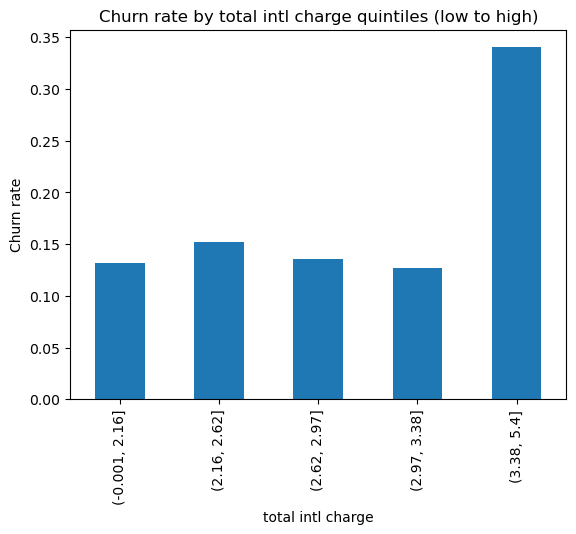

In [21]:
# are high charges linked to churn? (bining by quintiles)
def plot_binned_churn(col, q=5):
    b = pd.qcut(df[col], q=q, duplicates='drop')
    tbl = df.groupby(b)['churn_num'].mean()
    ax = tbl.plot(kind='bar')
    ax.set_title(f'Churn rate by {col} quintiles (low to high)')
    ax.set_ylabel('Churn rate'); ax.set_xlabel(col)
    return tbl

bins_day = plot_binned_churn('total day charge', q=5)
bins_intl = plot_binned_churn('total intl charge', q=5)

The above shows that high bailing charges increases the chances of customer churning. The 5th quintile has the highest charges and hence the high rate of churning. The company should consider moderating their charges to range from low to medium.

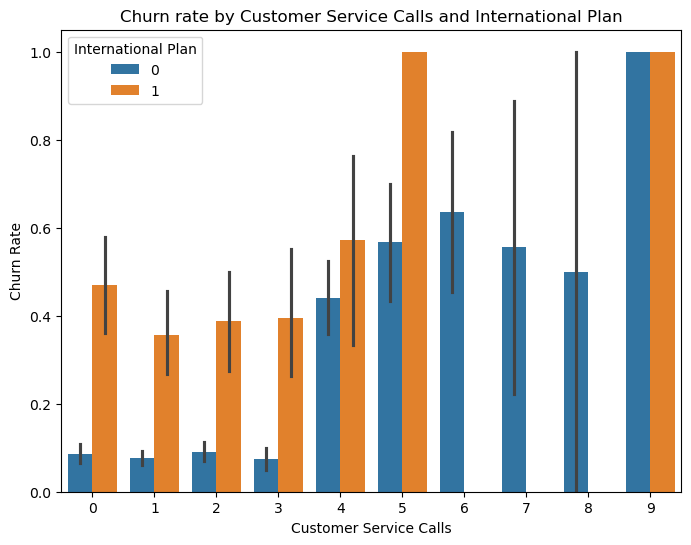

In [22]:

plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x="customer service calls",
    y="churn_num",
    hue="international plan",
    estimator="mean"
)
plt.title("Churn rate by Customer Service Calls and International Plan")
plt.ylabel("Churn Rate")
plt.xlabel("Customer Service Calls")
plt.legend(title="International Plan")
plt.show()

Customers with 0–2 service calls and no international plan have very low churn (~5–10%). That’s the “safe” group.
For customer service calls: As customer service calls increase, churn rate rises steeply. from 4+ calls, churn risk accelerates from 40 to 60%. By 5–9 calls, churn is extremely high about over 70 to 100%. This indicates frequent service issues are a major churn driver.
For international plan: Across almost all service call counts, customers with an international plan churn at a much higher rate than those without.for instance, at 0 calls, churn with an international plan is already ~45% vs ~8% without. At 4–5 calls, international plan customers approach 100% churn. This suggests dissatisfaction with the international plan (pricing, quality, or billing surprises). 

This shows that generally, having both many service calls + international plan is the worst combination: churn rate goes almost to 100%. So the two risk factors are independent and they compound each other.
What this means is high service call volume is a red flag and these customers need immediate intervention. International plan holders are disproportionately at risk even with few service calls therefore product or pricing review is urgent. Customers with both issues (international plan + frequent service calls) are the highest-priority retention segment.

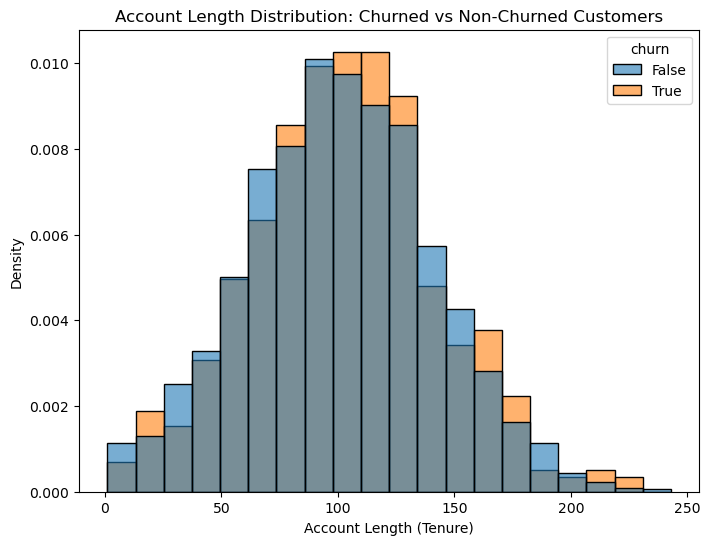

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x="account length",
    hue="churn",
    stat="density",
    common_norm=False,
    bins=20,
    alpha=0.6
)
plt.title("Account Length Distribution: Churned vs Non-Churned Customers")
plt.xlabel("Account Length (Tenure)")
plt.ylabel("Density")
plt.show()


This shows normal distribution of churning and not churning across account length. This indicates that account lenth is not a factor, rather syriatel can focus on other contributing factors to customer churn.

Below is a random forest for predicting the churn. It will help us with plotting the future importance. This tells management why those groups churn, so interventions can be justified.

/tmp/ipykernel_3697/2193130878.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances.head(20), x='importance', y='feature', palette='viridis')


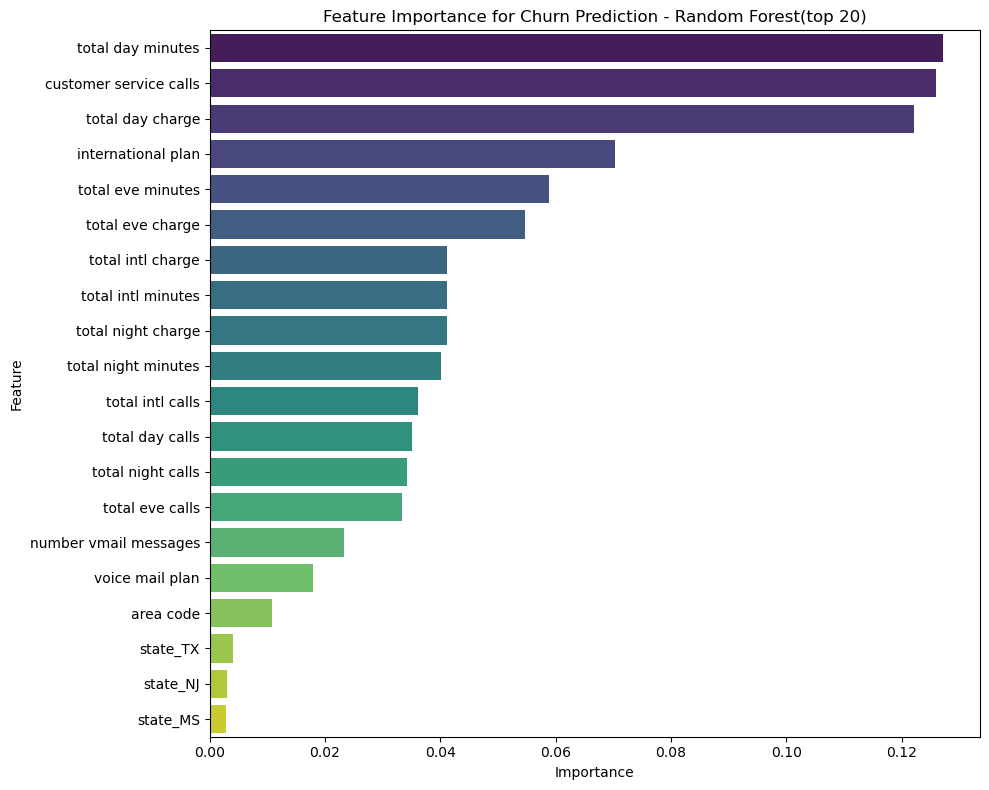

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
# Copy dataset and prepare features
X = df.drop(columns=['churn','churn_num','phone number','account length'])
y = df['churn_num']

# Method 1: Using pandas get_dummies (Simplest and most reliable)
X_processed = pd.get_dummies(X, drop_first=True)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_processed, y)

# Feature importance
importances = pd.DataFrame({
    'feature': X_processed.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=importances.head(20), x='importance', y='feature', palette='viridis')
plt.title("Feature Importance for Churn Prediction - Random Forest(top 20)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Customer service performance is the strongest churn signal - improving this can directly reduce churn.

High-usage customers (especially daytime callers) are at risk - need targeted retention offers.

International plan users are sensitive - better international packages could keep them loyal.

Voicemail and state-level differences don’t matter much - no need to allocate marketing budget here.

/tmp/ipykernel_3697/1350308318.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_churn.index, y=state_churn.values, palette="viridis")


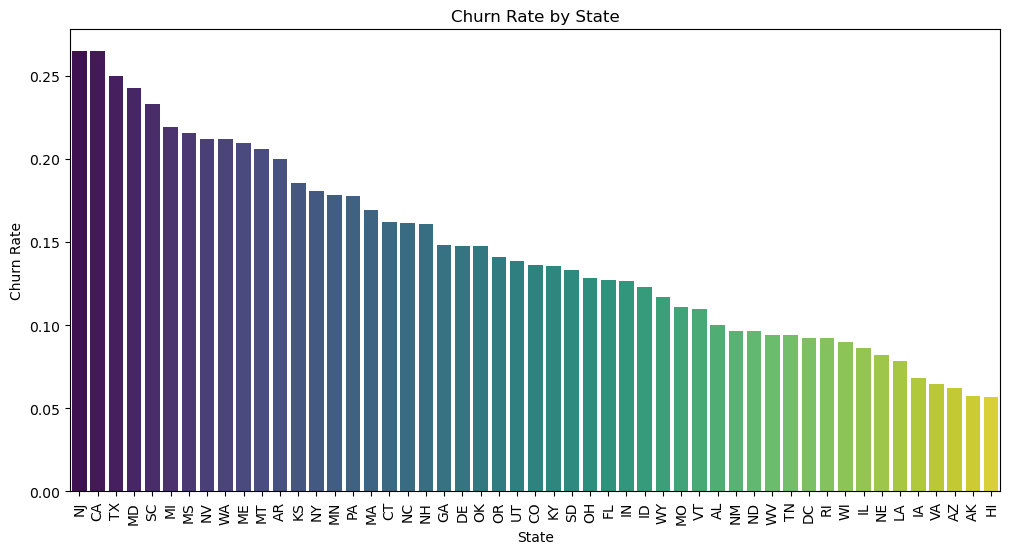

In [25]:
# Determining how states contribute to churning 
# Churn rate per state
state_churn = df.groupby("state")["churn"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=state_churn.index, y=state_churn.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Churn Rate by State")
plt.ylabel("Churn Rate")
plt.xlabel("State")
plt.show()

The barplot above shows churn rates across all states. The highest bar points to the state with the largest churn problem. SyriaTel should prioritize churn reduction campaigns in this states (targeted offers, better customer service, tailored retention strategies).

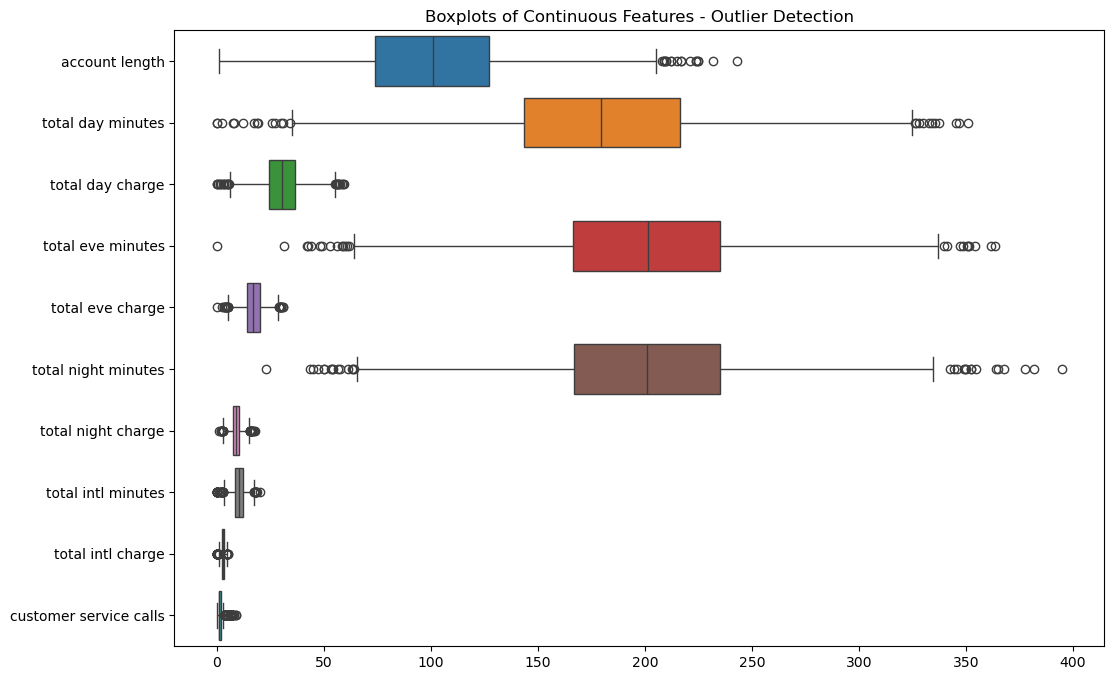

In [26]:
cont_vars = ['account length','total day minutes','total day charge',
             'total eve minutes','total eve charge',
             'total night minutes','total night charge',
             'total intl minutes','total intl charge',
             'customer service calls']

plt.figure(figsize=(12,8))
sns.boxplot(data=df[cont_vars], orient="h")
plt.title("Boxplots of Continuous Features - Outlier Detection")
plt.show()



Deciding to keep the outliers since they might have valuable insight. Later on we'll be applying log tranformation to reduce the effect.

##### 2.4 Assumptions check

In [27]:
# Assessing whether the target has a binary outcome
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [28]:
# Converting target variable to int
df['churn']=df['churn'].astype(int)
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,churn_num
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.7,1,0,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.7,1,0,0


Our target is a binary outcome

In [29]:
# Assessing independence of observation
df['phone number'].nunique(),df.shape[0]

(3333, 3333)

This means each row is unique since all the phone numbers were unique

In [30]:
# Assessing linearity of the logit for continuous predictors
import statsmodels.api as sm

# Select continuous features
cont_vars = ['account length','total day minutes','total eve minutes',
             'total night minutes','total intl minutes','customer service calls']

# Add interaction term with log(variable)
for var in cont_vars:
    df[var+'_log'] = df[var] * np.log(df[var] + 1)

# Fit model with interaction terms
X = sm.add_constant(df[cont_vars + [v+"_log" for v in cont_vars]])
y = df['churn_num']

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.333545
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              churn_num   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3320
Method:                           MLE   Df Model:                           12
Date:                Thu, 11 Sep 2025   Pseudo R-squ.:                  0.1939
Time:                        20:15:04   Log-Likelihood:                -1111.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                8.260e-107
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.5122      1.943     -0.778      0.436      

The logit tranformation has mixed oversights most variables are better without the transformation. However, total day minutes and customer service calls show a significant improvement indicating that the two need to be tranformed to improve the results of the final model.

In [31]:
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total intl charge,customer service calls,churn,churn_num,account length_log,total day minutes_log,total eve minutes_log,total night minutes_log,total intl minutes_log,customer service calls_log
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,2.7,1,0,0,622.055988,1480.284514,1044.302297,1346.856030,23.978953,0.693147
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,3.7,1,0,0,500.988041,822.752981,1032.369505,1410.096192,36.823511,0.693147


In [32]:
# checking for multicolinearlity
from statsmodels.stats.outliers_influence import variance_inflation_factor
cont_var = ['account length','total day minutes_log','total eve minutes',
             'total night minutes','total intl minutes','customer service calls_log']
X = df[cont_var] 
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                      feature        VIF
0                       const  62.496525
1              account length   1.000261
2       total day minutes_log   1.000359
3           total eve minutes   1.000530
4         total night minutes   1.000545
5          total intl minutes   1.000570
6  customer service calls_log   1.000382


From the above no multicolinearity is observed from our feature variables.

In [33]:
# Checking for convergence
model = sm.Logit(y, sm.add_constant(X)).fit()


Optimization terminated successfully.
         Current function value: 0.353937
         Iterations 7


This means our model coverges correctly as it should. No predictors that do too well at prediction. Hence, all our predictors are fit for our final model.

### 3. Modeling 
##### 3.1 Baseline model
##### Logistic Regression
We'll be using a logistic regression for our baseline model. For features we are using all the predictores available in the dataset excluding the target variable. We'll first onehotencode the multi-categorical variable state to have a smooth flow. We will aslo be evaluating our model based on ROC, Precision, Recall and accuracy. Later plot ROC curve to the outlook of our model efficiency compared to randomly predicting.

In [34]:
# Choosing X and y features as well as splitting the dataset into training and testing set
X =df.drop( columns=['account length', 'phone number','total day minutes','total eve minutes','total night minutes','total intl minutes','customer service calls', 'churn', 'churn_num'])
y=df['churn']


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

# (double brackets due to shape expected by OHE)
state_train = X_train[["state"]]
state_test = X_test[['state']]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe =   OneHotEncoder(categories='auto',sparse_output=False, handle_unknown="ignore")

# Fit the encoder on state_train and state_test
ohe.fit(state_train)
ohe.transform(state_test)

# Investigating 
ohe.categories_

# Transforming both state train and test sets
state_encoded_train = ohe.transform(state_train)
state_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    state_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)
state_encoded_test = ohe.transform(state_test)
state_encoded_test = pd.DataFrame(
    # Pass in NumPy array
    state_encoded_test,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_test.index
)

# Dropping the original state column
X_train.drop("state", axis=1, inplace=True)
X_test.drop("state", axis=1, inplace=True)

# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, state_encoded_train], axis=1)
X_test = pd.concat([X_test, state_encoded_test], axis=1)
X_train.head()
X_test.head()


# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [35]:
from sklearn.linear_model import LogisticRegression

# Instantiate a linear regression model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train,y_train)

/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
# Predicting the model 
y_pred = baseline_model.predict(X_test)

# Predicted probabilities for ROC
y_pred_proba = baseline_model.predict_proba(X_test)[:,1]

The baseline model achieved an accuracy of about 86%, precision of about 62% and a very low recall of 25%.

From the ROC visualization, we can see the model is predicting well as compared to the random guessing. Nevertheless, the model can't be recommended for any serious predictions in bussiness settings as it has underlying issues that need to be looked into. We simply saying the model has room for improvemnt as we'll try to do in our next models.

#### 3.2 Model 2
##### Regularized Logistic Regression
While our baseline logistic regression gives us decent accuracy (86%), the relatively low recall (25.7%) suggests the model struggles to identify churners. To improve generalization and handle potential hidden multicollinearity among predictors, we now apply a regularized logistic regression (Ridge penalty / L2). Normaly this helps shrink coefficients of less informative features without completely eliminating them, striking a balance between bias and variance. Lets see how that works for our model.

In [37]:
# l2 is our ridge
# model fitting 
ridge_model = LogisticRegression(penalty='l2',C=1e5,solver='liblinear',random_state=42)
ridge_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100000.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [38]:
# Prediction
y_pred_ridge = ridge_model.predict(X_test)

# Prediction for Roc
y_pred_proba_ridge = ridge_model.predict_proba(X_test)[:,1]

Using ridge regularization has helped keep all predictors but shrink their impact. The model performance has greately improved, with an accuracy of 87% compared to our base model which was 86%, precision incresed with 0.06, and recall increased with 0.1. It seem to be working well but still has room for improvement. 

In the next model we''ll try combine the L1 and L2 to see what their balanced stronghold will yield with our model. L1 - Lasso is used to shrink weak predictors, like make them 0.

#### 3.3 Model 3
##### L1 + L2
We now extend our baseline by applying L1 + L2 regularization. 

In [39]:
# Fitting the model
combined_model = LogisticRegression(penalty='elasticnet',max_iter=1000,class_weight='balanced',C=1.0,l1_ratio=0.5,solver='saga',random_state=42)
combined_model.fit(X_train,y_train)

/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,'elasticnet'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'saga'
,max_iter,1000
,multi_class,'deprecated'


We can start by tuning our l1_ratio to help control the balance between Lasso and Ridge.

In [40]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Defining parameter grid
param_grid = {
    'l1_ratio': [0.1,0.3,0.5,0.7,0.9],
    'C': [1,100,1000,100000]
}

# Combined l1+l2
elastic = LogisticRegression(penalty='elasticnet', max_iter=5000,class_weight='balanced',solver='saga',random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=elastic,param_grid=param_grid,scoring='roc_auc',cv =5, n_jobs=-1)

grid_search.fit(X_train,y_train)

print('B parameters', grid_search.best_params_)
print('B cv ROC AUC', grid_search.best_score_)

/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

B parameters {'C': 100, 'l1_ratio': 0.5}
B cv ROC AUC 0.8119654441851845


/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


After tuning the l1_ratio, we now fit the combined model to the training data and compare its performance with the baseline and Ridge.

In [41]:
# combined model with tuned hyperparameters
elastic_model = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    l1_ratio=0.5,   
    C=100,          
    max_iter=5000,
    random_state=42
)

# Fit model
elastic_model.fit(X_train, y_train)

# Predictions
y_pred_en = elastic_model.predict(X_test)
y_pred_proba_en = elastic_model.predict_proba(X_test)[:,1]

/home/r0s1ta/anaconda3/envs/learn-env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### 3.4 Model 4
##### Decission tree classifier
The Decision tree classifier is a simple yet powerful model that works by splitting the data into decision rules based on feature values. It’s easy to interpret and visualize, making it useful for understanding which factors drive churn. However, decision trees can overfit, so we evaluate its generalization ability carefully by hyperparameter tuning.

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)  

# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:,1]

#### Model 5
##### Random Forest
The Random Forest model is an ensemble of multiple decision trees, where each tree is trained on different subsets of the data and features. By aggregating predictions from many trees, the model reduces overfitting and often achieves higher predictive performance. We include Random Forest to see if combining many weak learners can outperform individual models like Logistic Regression or a single Decision Tree.

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Defining the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],   
    "max_depth": [None, 10, 20],       
    "min_samples_split": [2, 5, 10],   
    "min_samples_leaf": [1, 2, 4]
}

# Initialize rm
rf = RandomForestClassifier(random_state=42)

# Grid search with 5-fold CV, optimizing for recall
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="recall",
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
y_pred_rf_tuned = best_rf.predict(X_test)
y_pred_proba_rf_tuned = best_rf.predict_proba(X_test)[:,1]

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

# 4. Evaluation
In this section, we evaluate the performance of the developed models against the predefined success criteria. The goal of the project was not only to predict customer churn but also to ensure that the models are practically useful for SyriaTel’s retention strategies.

Our success criteria (Section 1.5) require the models to achieve:
High Recall above 80%, ensuring that most at-risk customers are identified for targeted retention.
Balanced performance, with an ROC AUC above 80% and f1-score above 70%, to guarantee that the models are both reliable and discriminative.

To assess performance, we compared multiple models: Baseline Logistic Regression, Ridge Logistic Regression, Elastic Net Logistic Regression, Random Forest, and Decision Tree. Each model is evaluated using Accuracy, Precision, Recall, and ROC AUC, with a particular emphasis on Recall and ROC AUC, since these directly impact churn detection and retention decision-making.

Finally, to complement the metric-based evaluation, we will also visualize and compare the ROC curves of all models. This will provide a clearer picture of how well each model distinguishes between churn and non-churn customers across different thresholds allowing us to judge model performance beyond single-threshold metrics.


#### 4.1 Logistic Regression

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve,roc_auc_score,f1_score, confusion_matrix, classification_report

# Evaluation Metrics 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"ROC AUC :   {roc_auc:.3f}")
print(f"F1_Score :   {f1:.3F}")
print(f"ROC:   {fpr, tpr, thresholds}")

# Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy:  0.789
Precision: 0.397
Recall:    0.762
ROC AUC :   0.838
F1_Score :   0.522
ROC:   (array([0.        , 0.        , 0.        , 0.00176678, 0.00176678,
       0.00353357, 0.00353357, 0.00530035, 0.00530035, 0.00706714,
       0.00706714, 0.00883392, 0.00883392, 0.01060071, 0.01060071,
       0.01236749, 0.01236749, 0.01413428, 0.01413428, 0.01590106,
       0.01590106, 0.01766784, 0.01766784, 0.02650177, 0.02650177,
       0.02826855, 0.02826855, 0.03003534, 0.03003534, 0.03533569,
       0.03533569, 0.03886926, 0.03886926, 0.04063604, 0.04063604,
       0.0459364 , 0.0459364 , 0.04946996, 0.04946996, 0.0565371 ,
       0.0565371 , 0.06890459, 0.06890459, 0.07067138, 0.07067138,
       0.07773852, 0.07773852, 0.08303887, 0.08303887, 0.08833922,
       0.08833922, 0.09363958, 0.09363958, 0.09717314, 0.09717314,
       0.10070671, 0.10070671, 0.1024735 , 0.1024735 , 0.10600707,
       0.10600707, 0.10777385, 0.10777385, 0.10954064, 0.10954064,
       0.11837456, 0.11837456, 0.

#### 4.2 Regularized Logistic Regression

In [74]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred_ridge)
precision = precision_score(y_test, y_pred_ridge)
recall = recall_score(y_test, y_pred_ridge)
fpr_R, tpr_R, thresholds = roc_curve(y_test, y_pred_proba_ridge)
roc_ridge = roc_auc_score(y_test, y_pred_proba_ridge)
f1_R= f1_score(y_test, y_pred_ridge)

print(f"Accuracy R:  {accuracy:.3f}")
print(f"Precision R: {precision:.3f}")
print(f"Recall R:    {recall:.3f}")
print(f"ROC AUC R:   {roc_ridge:.3f}")
print(f"F1_Score R:   {f1_R:.3F}")

Accuracy R:  0.819
Precision R: 0.438
Recall R:    0.703
ROC AUC R:   0.853
F1_Score R:   0.540


#### 4.3 L1 + L2

In [75]:
# Evaluation
accuracy_en = accuracy_score(y_test, y_pred_en)
precision_en = precision_score(y_test, y_pred_en)
recall_en = recall_score(y_test, y_pred_en)
roc_auc_en = roc_auc_score(y_test, y_pred_proba_en)
f1_en= f1_score(y_test, y_pred_en)

print("Elastic Net Logistic Regression Results")
print(f"Accuracy EN:  {accuracy_en:.3f}")
print(f"Precision EN: {precision_en:.3f}")
print(f"Recall EN:    {recall_en:.3f}")
print(f"ROC AUC EN:   {roc_auc_en:.3f}")
print(f"F1_Score EN:   {f1_en:.3F}")

Elastic Net Logistic Regression Results
Accuracy EN:  0.754
Precision EN: 0.349
Recall EN:    0.723
ROC AUC EN:   0.801
F1_Score EN:   0.471


#### 4.4 Decission tree classifier

In [76]:
# Evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Results")
print(f"Accuracy DT:  {accuracy_dt:.3f}")
print(f"Precision DT: {precision_dt:.3f}")
print(f"Recall DT:    {recall_dt:.3f}")
print(f"ROC AUC DT:   {roc_auc_dt:.3f}")
print(f"F1_Score DT:   {f1_dt:.3F}")

Decision Tree Results
Accuracy DT:  0.901
Precision DT: 0.638
Recall DT:    0.802
ROC AUC DT:   0.895
F1_Score DT:   0.711


#### 4.5 Random Forest

In [77]:
# Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf_tuned )
precision_rf = precision_score(y_test, y_pred_rf_tuned )
recall_rf = recall_score(y_test, y_pred_rf_tuned )
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf_tuned)
f1_rf = f1_score(y_test, y_pred_rf_tuned )

print("Random Forest Results")
print(f"Accuracy RF:  {accuracy_rf:.3f}")
print(f"Precision RF: {precision_rf:.3f}")
print(f"Recall RF:    {recall_rf:.3f}")
print(f"ROC AUC RF:   {roc_auc_rf:.3f}")
print(f"F1_Score R:   {f1_rf:.3F}")


Random Forest Results
Accuracy RF:  0.927
Precision RF: 0.810
Recall RF:    0.673
ROC AUC RF:   0.919
F1_Score R:   0.735


ROC-AUC Visualization to see how the performance is varying between the models

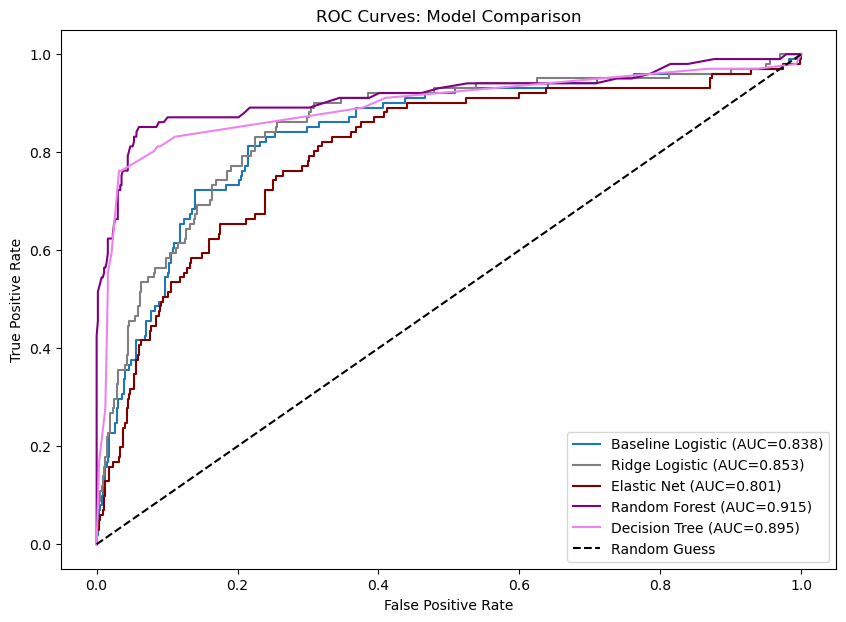

In [78]:
# ROC Curves for All Models

# Baseline Logistic
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Ridge
fpr_R, tpr_R, _ = roc_curve(y_test, y_pred_proba_ridge)

# L1+L2
fpr_en, tpr_en, _ = roc_curve(y_test, y_pred_proba_en)

# Decision Tree
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

# Random Forest
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

# Plotting
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label=f'Baseline Logistic (AUC={roc_auc_score(y_test,y_pred_proba):.3f})')
plt.plot(fpr_R, tpr_R, label=f'Ridge Logistic (AUC={roc_auc_score(y_test,y_pred_proba_ridge):.3f})', color='grey')
plt.plot(fpr_en, tpr_en, label=f'Elastic Net (AUC={roc_auc_score(y_test,y_pred_proba_en):.3f})', color='maroon')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_score(y_test,y_pred_proba_rf):.3f})', color='purple')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={roc_auc_score(y_test,y_pred_proba_dt):.3f})', color='violet')

# Random Guess Line
plt.plot([0,1],[0,1],'k--', label="Random Guess")

# Formatting
plt.title("ROC Curves: Model Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Models comparison of the metrics evaluations

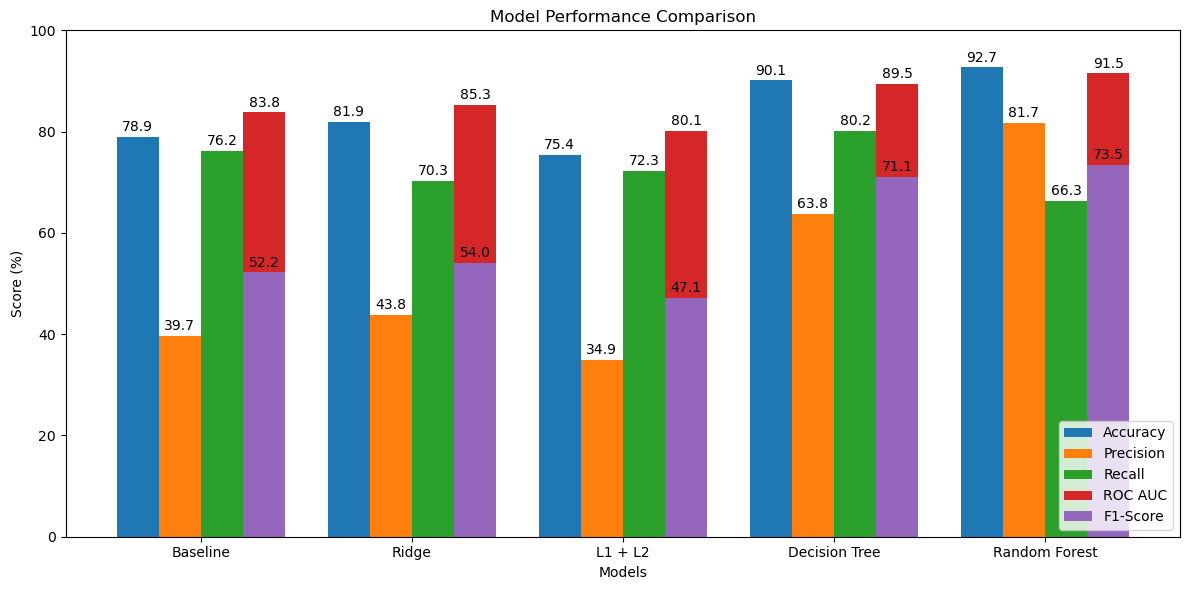

In [79]:
# Models
models = ["Baseline", "Ridge", "L1 + L2", "Decision Tree", "Random Forest"]

# Metrics (converted to %)
accuracy = [78.9, 81.9, 75.4, 90.1, 92.7]
precision = [39.7, 43.8, 34.9, 63.8, 81.7]
recall = [76.2, 70.3, 72.3, 80.2, 66.3]
roc_auc = [83.8, 85.3, 80.1, 89.5, 91.5]  
f1_score = [52.2, 54.0, 47.1, 71.1, 73.5] 

# Group bar setup
x = np.arange(len(models)) 
width = 0.2 
fig, ax = plt.subplots(figsize=(12,6))

# Bars for each metric
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
ax.bar(x - 0.5*width, precision, width, label='Precision')
ax.bar(x + 0.5*width, recall, width, label='Recall')
ax.bar(x + 1.5*width, roc_auc, width, label='ROC AUC')
ax.bar(x + 1.5*width, f1_score, width, label='F1-Score')

# Labels and title
ax.set_ylabel('Score (%)')
ax.set_xlabel('Models')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='lower right')

# Show values on top of bars
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.1f", padding=2)

plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [81]:
# Best performing model
# Data as dictionary
results = {
    "Model": ["Baseline", "Ridge", "Elastic Net", "Decision Tree", "Random Forest"],
    "Accuracy (%)": [78.9, 81.9, 75.4, 90.1, 92.7],
    "Precision (%)": [39.7, 43.8, 34.9, 63.8, 81.7],
    "Recall (%)": [76.2, 70.3, 72.3, 80.2, 66.3],
    "ROC AUC (%)": [84.0, 85.3, 80.1, 89.5, 91.5],
    "F1_score (%)": [52.2, 54.0, 47.1, 71.1, 73.5]
}
df_results = pd.DataFrame(results)

# Highlight best model per metric
summary = df_results.set_index("Model")
best_per_metric = summary.idxmax()

print("Best model per metric:")
print(best_per_metric)


Best model per metric:
Accuracy (%)     Random Forest
Precision (%)    Random Forest
Recall (%)       Decision Tree
ROC AUC (%)      Random Forest
F1_score (%)     Random Forest
dtype: object


Random Forest gives the best balance across all metrics.
- Highest Accuracy (most correct overall predictions)
- Highest Precision (least false positives → fewer wasted interventions)
- Highest F1 Score (good balance between precision and recall)
- Highest ROC AUC (best overall ranking ability)
- Decision Tree has the highest Recall (captures the most churners), but its precision and overall balance are weaker compared to Random Forest.

Choosing Random Forest as the final model, since it provides the best trade-off between identifying churners and avoiding false alarms.
If the business goal is heavily skewed toward maximizing recall at all costs (catch every possible churner), then a tuned Decision Tree could be a backup option.
Otherwise, Random Forest is the best success metric performer.